In [0]:
%matplotlib inline

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import requests
from PIL import Image
from datetime import datetime, timedelta
import time

Generic URL format for obtaining map layer tiles

In [0]:
URL = (
    "https://gibs-{s}.earthdata.nasa.gov/wmts/epsg4326/best/{layer}"
    + "/default/{date}/{tile_matrix_set}/{z}/{y}/{x}.{image_format}"
)

In [0]:
def get_tile_as_image(
    layer: str,
    date: str,
    tile_matrix_set: str,
    z: int,
    y: int,
    x: int,
    image_format: str,
    s: str = "c",
) -> Image:
    """
    Returns an image tile from an image layer
    
    Args:
        s (str): Sub-doomain. Either "a", "b", "c"
        date (str): Date in format "YYYY-MM-DD"
        tile_matrix_set (str): The tile matrix format
        z (int): Zoom level e.g. 0
        x (int): The x position e.g. 1
        y (int): The y posiiton e.g. 2
        image_format (str): The image format e.g. png
    
    Returns:
        Image: PIL.Image object of image tile
    """
    response = requests.get(
        URL.format(
            s=s,
            layer=layer,
            date=date,
            tile_matrix_set=tile_matrix_set,
            z=z,
            y=y,
            x=x,
            image_format=image_format,
        )
    )
    return Image.open(BytesIO(response.content))

The `layer` is the under_scored name from the GIBS website. The `tile_matrix_set` refers to the projections that could be one of below ([link](https://wiki.earthdata.nasa.gov/display/GIBS/GIBS+API+for+Developers)).

* EPSG:4326 - Lat-lon / Geographic / WGS 84
* EPSG:3857 - Web Mercator / Spherical Mercator / "Google Projection"
* EPSG:3413 - NSIDC Sea Ice Polar Stereographic North
* EPSG:3031 - Antarctic Polar Stereographic / WGS 84

`tile_matrix_set` possible options would also include the tile size in it as well, for example `EPSG4326_1km` for 1 km tiles, and `EPSG4326_500m` for 500 m tiles. Check the correct tile size for each layer.

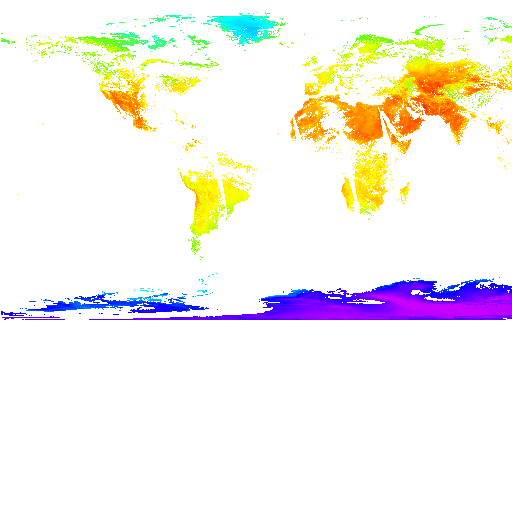

In [6]:
get_tile_as_image(
    s="c",
    layer="MODIS_Aqua_L3_Land_Surface_Temp_Daily_Day",
    date="2020-05-26",
    tile_matrix_set="EPSG4326_1km",
    z=0,
    x=0,
    y=0,
    image_format="png",
)

Example as array

In [7]:
tile = get_tile_as_image(
    s="c",
    layer="MODIS_Aqua_L3_Land_Surface_Temp_Daily_Day",
    date="2020-05-26",
    tile_matrix_set="EPSG4326_1km",
    z=0,
    x=0,
    y=0,
    image_format="png",
)
tile_array = np.array(tile)
tile_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)